In [1]:
%matplotlib inline
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# pregunta 1

¿Cuánto es el máximo que podemos llegar a pagar en un día por los servidores?

In [2]:
coste_nodo = 130
coste_nodo_3up = 110
horas_por_nodo = 72
num_analistas = 14
horas_max_job = 33.1


def coste_nodos(nodos_necesarios: int) -> int:
    if nodos_necesarios > 2:
        coste_nodos_max = (nodos_necesarios - 2) * coste_nodo_3up + (2 * coste_nodo)
    else:
        coste_nodos_max = nodos_necesarios * coste_nodo
    return coste_nodos_max

horas_max = num_analistas * horas_max_job
nodos_necesarios = round(horas_max / horas_por_nodo)

print("El coste máximo a pagar en 1 día es de {}€".format(coste_nodos(nodos_necesarios)))

El coste máximo a pagar en 1 día es de 700€


## pregunta 2

Pinta un histograma de la distribución de los costes diarios realizando simulaciones de Monte Carlo.

¿Cuál es el coste medio por día que esperamos tener que pagar por los servidores, si siempre pagamos todos los servidores que hacen falta en un día dado?

In [46]:
def job_duration():
    # probabilidad de sacar entre 15.7 y 33.1 horas
    return np.random.uniform(15.7, 33.1)


def simulation_done():
    return np.random.binomial(num_analistas, .156, 1)


def daily_cost():
    simulations = simulation_done()[0]
    job_hours = []
    for i in range(simulations):
        job_hours.append(job_duration())
    nodes = round(sum(job_hours) / horas_por_nodo)
    return coste_nodos(nodes)


def get_costs_by_trials(trials: int):
    costs = []
    for i in range(trials):
        costs.append(daily_cost())
    return costs


El coste media sería de 94.76€


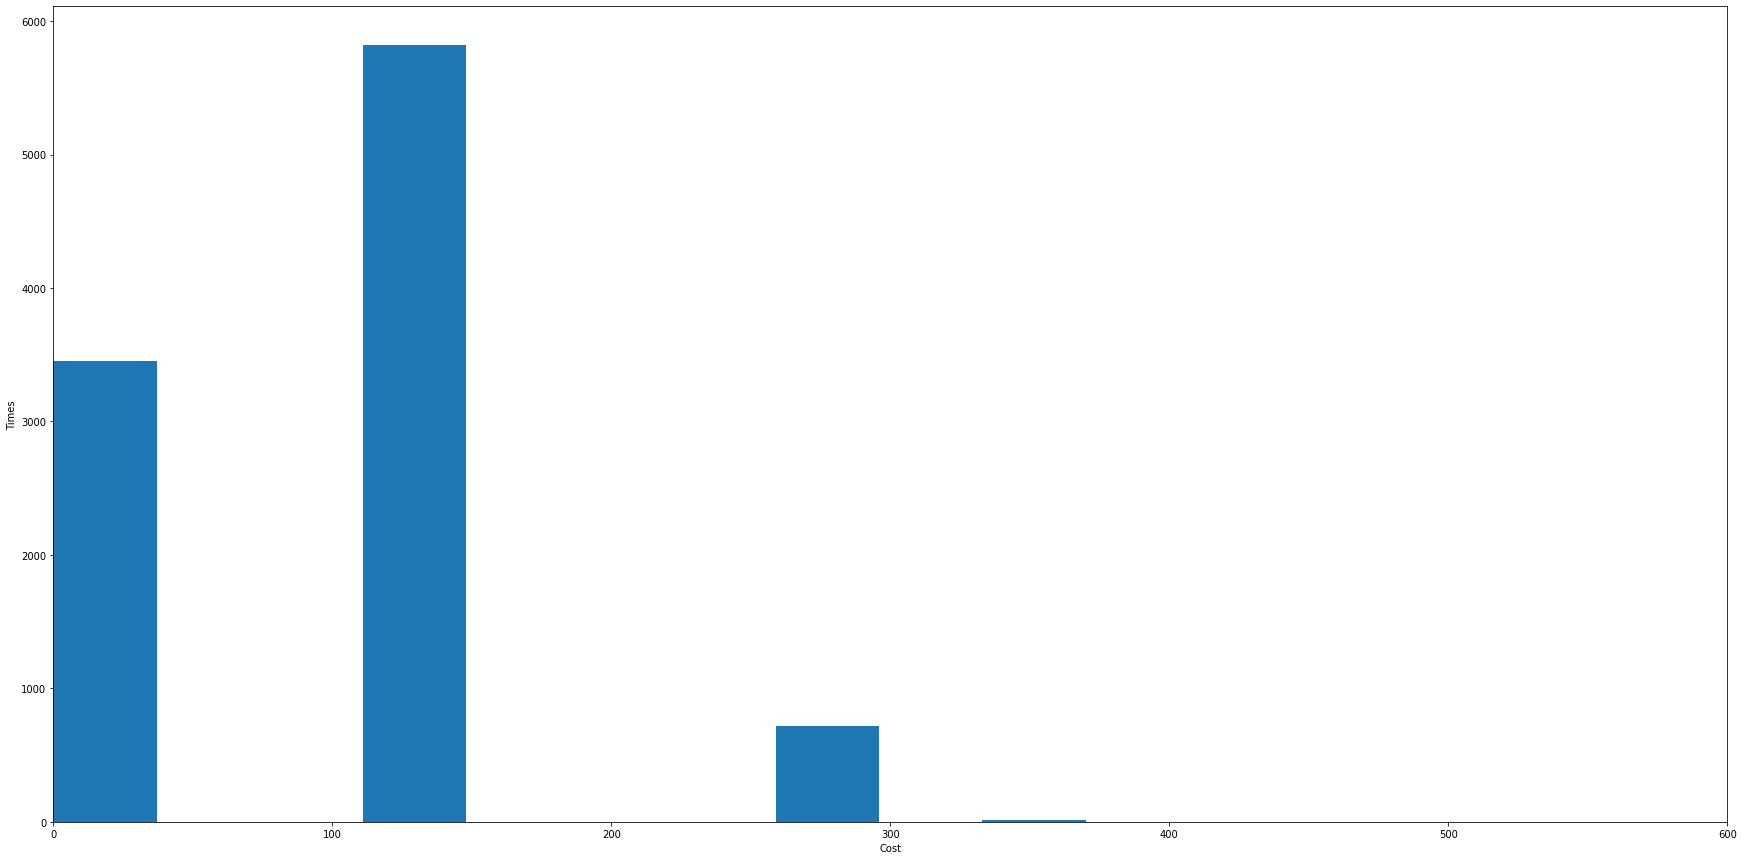

In [55]:
costs = get_costs_by_trials(10000)
plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.xlim(0,600)
_ = plt.hist(costs, bins=10, hist)


print("El coste media sería de {0:.2f}€".format(sum(costs) / len(costs)))

## pregunta 3

Supongamos que siempre pagamos todos los servidores que hacen falta en un día dado.

Pinta un histograma de la distribución de los gastos semanales realizando experimentos de Monte Carlo.

¿Cuál es la probabilidad que el gasto en una semana laborable (5 días) supere los 900 euros?